In [179]:
from keras.preprocessing.image import ImageDataGenerator

## Load Data

In [180]:
batch_size=32

train_datagen=ImageDataGenerator(
    rescale=1/255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )
test_datagen=ImageDataGenerator(rescale=1/255)
train_generator=train_datagen.flow_from_directory(
    'train',
    target_size=(48,48),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

validation_generator=test_datagen.flow_from_directory(
    'test',
    target_size=(48,48),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Transfer Learning using VGG

In [181]:
from keras.applications.vgg16 import VGG16

In [182]:
vgg=VGG16(include_top=False,input_shape=(48,48,3))

In [183]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [184]:
from keras import Sequential

In [185]:
model=Sequential()

In [186]:
for layer in vgg.layers:
    model.add(layer)

In [187]:
for layer in model.layers:
    layer.trainable=False

In [188]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 12, 12, 256)      

In [189]:
from keras.layers import Dense,Flatten

In [193]:
model.add(Flatten())
# model.add(Dense(128,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7,activation='softmax'))

In [194]:
model.compile(optimizer='Adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [195]:
model.fit_generator(train_generator,
                   epochs=25,
                   validation_data=validation_generator
                   )

Epoch 1/25


/var/folders/bq/5zg29r510_19d9cvc5d7t8ww0000gn/T/ipykernel_24349/1198837347.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


898/898 [==============================] - 404s 450ms/step - loss: 1.6216 - accuracy: 0.3737 - val_loss: 1.5875 - val_accuracy: 0.3941
Epoch 2/25
898/898 [==============================] - 381s 424ms/step - loss: 1.5697 - accuracy: 0.3959 - val_loss: 1.5620 - val_accuracy: 0.4019
Epoch 3/25
898/898 [==============================] - 2387s 3s/step - loss: 1.5530 - accuracy: 0.3995 - val_loss: 1.5347 - val_accuracy: 0.4062
Epoch 4/25
898/898 [==============================] - 406s 452ms/step - loss: 1.5447 - accuracy: 0.4006 - val_loss: 1.5216 - val_accuracy: 0.4099
Epoch 5/25
898/898 [==============================] - 380s 423ms/step - loss: 1.5276 - accuracy: 0.4114 - val_loss: 1.5196 - val_accuracy: 0.4213
Epoch 6/25
898/898 [==============================] - 354s 395ms/step - loss: 1.5239 - accuracy: 0.4123 - val_loss: 1.5249 - val_accuracy: 0.4107
Epoch 7/25
898/898 [==============================] - 2316s 3s/step - loss: 1.5116 - accuracy: 0.4157 - val_loss: 1.5149 - val_accuracy: 

In [196]:
model.save('emotion_detector_VGG_25epochs.h5')

## CNN Model

In [78]:
from keras.layers import Dropout
from keras.layers import Conv2D,MaxPooling2D
from matplotlib import pyplot as plt
import numpy as np

In [117]:
batch_size=32
train_datagen=ImageDataGenerator(
    rescale=1/255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
    )
validation_datagen=ImageDataGenerator(rescale=1/255)

train_generator=train_datagen.flow_from_directory(
    'train',
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

validation_generator=test_datagen.flow_from_directory(
    'test',
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [118]:
class_labels=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

In [119]:
img,label=train_generator.__next__()

In [120]:
import random

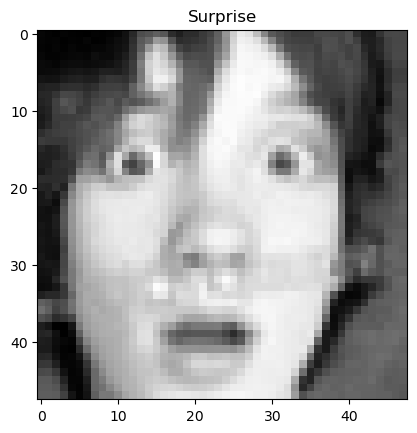

In [121]:
i=random.randint(0,(img.shape[0])-1)
image=img[i]
labl=class_labels[label[i].argmax()]
plt.imshow(image[:,:,0],cmap='gray')
plt.title(labl)
plt.show()

In [122]:
model1=Sequential()

In [123]:
model1.add(Conv2D(32,kernel_size=(3,3),activation='relu',
                input_shape=(48,48,1)))
model1.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.1))

model1.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.1))

model1.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.1))

model1.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.2))

model1.add(Flatten())
model1.add(Dense(512,activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(7,activation='softmax'))


In [124]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',
             metrics=['accuracy'])

In [125]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 conv2d_17 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 22, 22, 64)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 10, 10, 128)      0         
 g2D)                                                 

In [126]:
history=model1.fit(train_generator,
                   epochs=50,
                   validation_data=validation_generator
                   )

Epoch 1/50
898/898 [==============================] - 139s 154ms/step - loss: 1.7716 - accuracy: 0.2693 - val_loss: 1.6615 - val_accuracy: 0.3270
Epoch 2/50
898/898 [==============================] - 137s 153ms/step - loss: 1.6599 - accuracy: 0.3394 - val_loss: 1.4779 - val_accuracy: 0.4302
Epoch 3/50
898/898 [==============================] - 137s 152ms/step - loss: 1.5110 - accuracy: 0.4095 - val_loss: 1.3527 - val_accuracy: 0.4707
Epoch 4/50
898/898 [==============================] - 137s 153ms/step - loss: 1.4316 - accuracy: 0.4472 - val_loss: 1.2733 - val_accuracy: 0.5138
Epoch 5/50
898/898 [==============================] - 136s 152ms/step - loss: 1.3793 - accuracy: 0.4709 - val_loss: 1.2339 - val_accuracy: 0.5287
Epoch 6/50
898/898 [==============================] - 137s 153ms/step - loss: 1.3346 - accuracy: 0.4896 - val_loss: 1.2032 - val_accuracy: 0.5412
Epoch 7/50
898/898 [==============================] - 137s 153ms/step - loss: 1.3087 - accuracy: 0.4992 - val_loss: 1.2133 -

In [129]:
# model1.save('Emotion_Detection_CNN_50epochs.h5')

In [131]:
from keras.models import load_model

In [132]:
my_model=load_model('Emotion_Detection_CNN_50epochs.h5',compile=False)

In [162]:
test_img,test_lbl=validation_generator.__next__()

In [163]:
len(test_img)

32

In [164]:
predictions=my_model.predict(test_img)

1/1 [==============================] - 0s 74ms/step


In [165]:
predictions=np.argmax(predictions,axis=1)
test_lables=np.argmax(test_lbl,axis=1)

In [166]:
len(predictions)

32

In [167]:
from sklearn import metrics
import seaborn as sns

In [168]:
print('Accuracy=',metrics.accuracy_score(test_lables,predictions))

Accuracy= 0.59375


In [169]:
from sklearn.metrics import confusion_matrix

<Axes: >

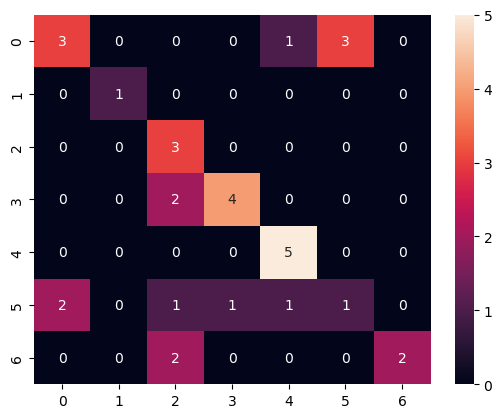

In [170]:
cm=confusion_matrix(test_lables,predictions)
sns.heatmap(cm,annot=True) 

In [171]:
class_labels=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

## Predictions

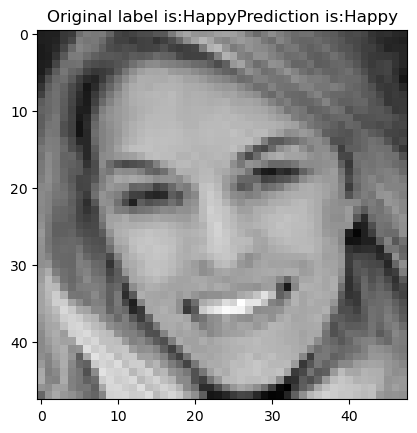

In [175]:
n=random.randint(0,test_img.shape[0]-1)
image=test_img[n]
orig_labl=class_labels[test_lables[n]]
pred_labl=class_labels[predictions[n]]
plt.imshow(image[:,:,0],cmap='gray')
plt.title('Original label is:'+orig_labl+'Prediction is:'+pred_labl)
plt.show()

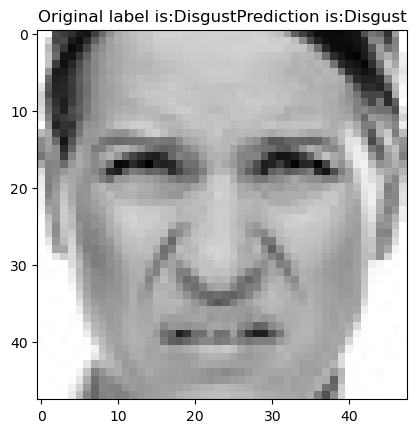

In [178]:
n=random.randint(0,test_img.shape[0]-1)
image=test_img[n]
orig_labl=class_labels[test_lables[n]]
pred_labl=class_labels[predictions[n]]
plt.imshow(image[:,:,0],cmap='gray')
plt.title('Original label is:'+orig_labl+'Prediction is:'+pred_labl)
plt.show()